In [515]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug = "data/mouse_drug_data.csv"
trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df = pd.read_csv(drug)
trial_df = pd.read_csv(trial)

# Combine the data into a single dataset
df = pd.merge(trial_df,drug_df, how='left', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [516]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to DataFrame
vol_mean = pd.DataFrame(
    df.groupby(['Drug','Timepoint'], as_index=False)['Tumor Volume (mm3)'].mean()
)

# Preview DataFrame
vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [517]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
vol_sem = pd.DataFrame(
    df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
)

# Using the 'as_index=False' argument with the .sem() function results in error: 'str' object has no attribute 'sqrt'.
# Apparently this is a known bug with .std() and .sem() in groupby, the sqrt is applied to the grouping columns as well.
# Workaround is to use .reset_index() instead.

# Preview DataFrame
vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [518]:
# Minor Data Munging to Re-Format the Data Frames
pvt_vol_mean = vol_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', )
pvt_vol_sem = vol_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', )

# Preview that Reformatting worked
pvt_vol_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


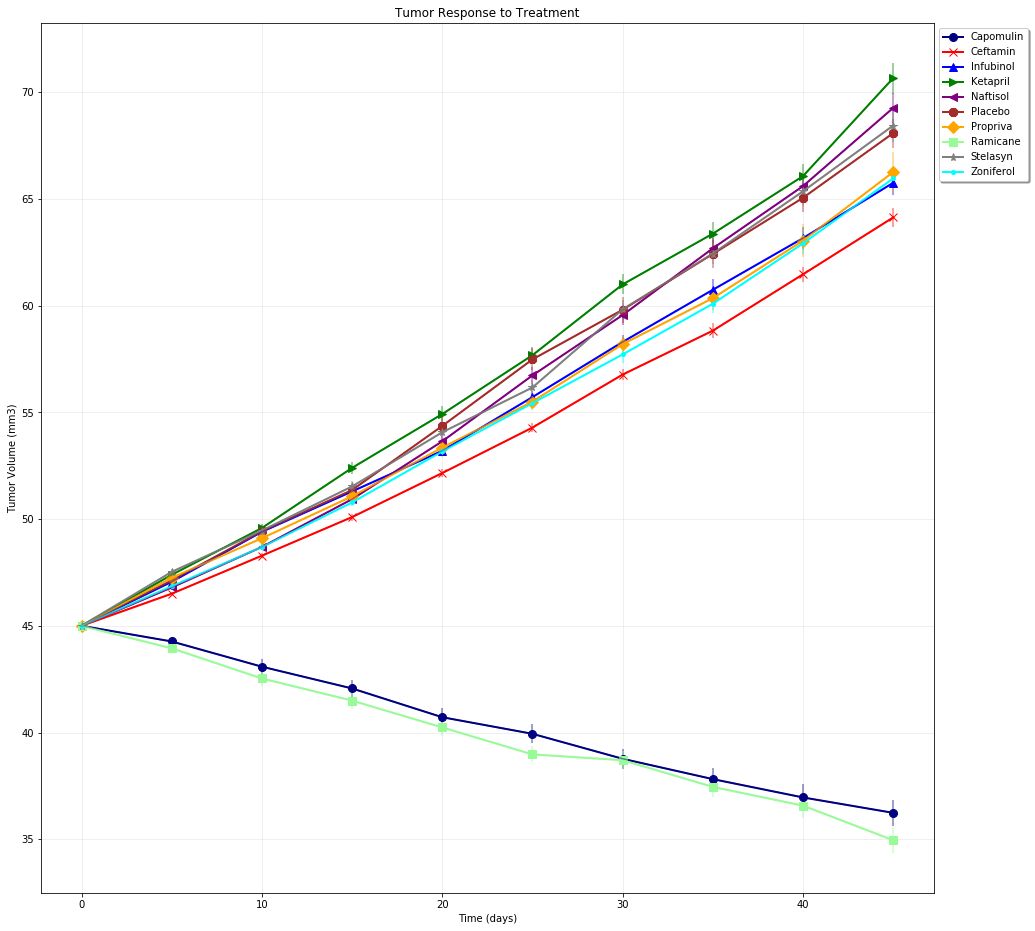

In [519]:
# Generate the Plot (with Error Bars)
drugs = pvt_vol_mean.columns.values 
x_axis = df['Timepoint'].unique()
markers = ['o','x','^','>','<','8','D','s','*','.']
colors = ['navy','red','blue','green','purple','brown','orange','palegreen','grey','cyan']
plt.figure(figsize=(16,16))

i=0
for drug in drugs:
    plt.plot(
        x_axis, 
        pvt_vol_mean[drug],
        lw=2,
        markersize=8,
        marker=markers[i],
        color=colors[i]
    )
    yerr = vol_sem[vol_sem['Drug'] == drug]['Tumor Volume (mm3)']
    plt.errorbar(x_axis, pvt_vol_mean[drug], yerr=.5*yerr, color=colors[i], alpha=.5)
    plt.legend(drugs, bbox_to_anchor=(1,1), fancybox=True, shadow=True)
    i+=1

plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (days)')
plt.grid(alpha=.25)

# Save the Figure
plt.savefig("Images/TumorResponstoTreatment.png",bbox_inches="tight")
plt.show()

In [520]:
vol_sem[vol_sem['Drug'] == drug]['Tumor Volume (mm3)'].values

array([0.        , 0.18895032, 0.26394944, 0.37054441, 0.5331823 ,
       0.60251288, 0.80004266, 0.88142579, 0.99851517, 1.00357578])

## Metastatic Response to Treatment

In [521]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = pd.DataFrame(
    df.groupby(['Drug','Timepoint'], as_index=False)['Metastatic Sites'].mean()
)

# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [522]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = pd.DataFrame(
    df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()
)

# Preview DataFrame
met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [523]:
# Minor Data Munging to Re-Format the Data Frames
pvt_met_mean = met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites', )
pvt_met_sem = met_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites', )

# Preview that Reformatting worked
pvt_met_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


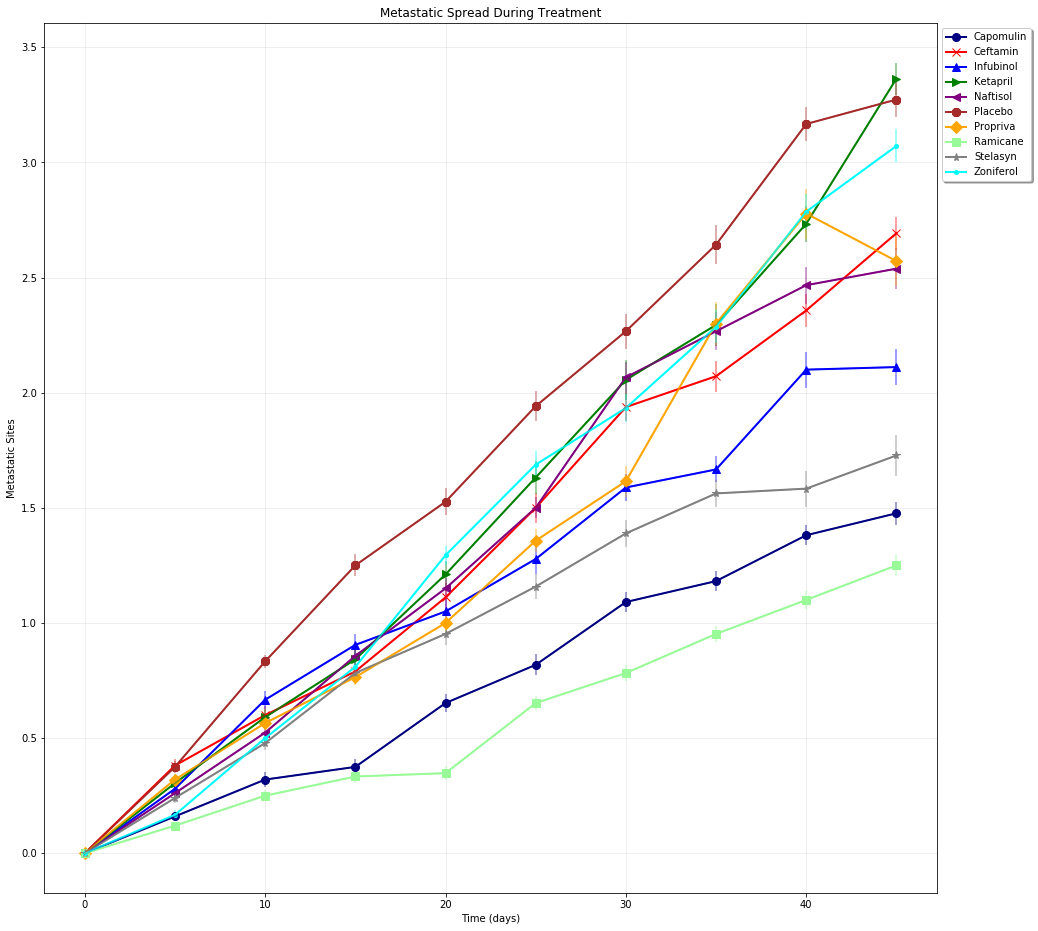

In [524]:
# Generate the Plot (with Error Bars)
drugs = pvt_met_mean.columns.values 
x_axis = df['Timepoint'].unique()
markers = ['o','x','^','>','<','8','D','s','*','.']
colors = ['navy','red','blue','green','purple','brown','orange','palegreen','grey','cyan']
plt.figure(figsize=(16,16))

i=0
for drug in drugs:
    plt.plot(
        x_axis, 
        pvt_met_mean[drug],
        lw=2,
        markersize=8,
        marker=markers[i],
        color=colors[i]
    )
    yerr = met_sem[met_sem['Drug'] == drug]['Metastatic Sites']
    plt.errorbar(x_axis, pvt_met_mean[drug], yerr=.25*yerr, color=colors[i], alpha=.5)
    plt.legend(drugs, bbox_to_anchor=(1,1), fancybox=True, shadow=True)
    i+=1

plt.title('Metastatic Spread During Treatment')
plt.ylabel('Metastatic Sites')
plt.xlabel('Time (days)')
plt.grid(alpha=.25)

# Save the Figure
plt.savefig("Images/MetastaticSpreadDuringTreatment.png",bbox_inches="tight")
plt.show()

## Survival Rates

In [525]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mou_cnt = pd.DataFrame(
    df.groupby(['Drug','Timepoint'], as_index=False)['Mouse ID'].count()
)

# Preview DataFrame
mou_cnt.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [526]:
# Minor Data Munging to Re-Format the Data Frames
pvt_mou_cnt = mou_cnt.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
pvt_mou_cnt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


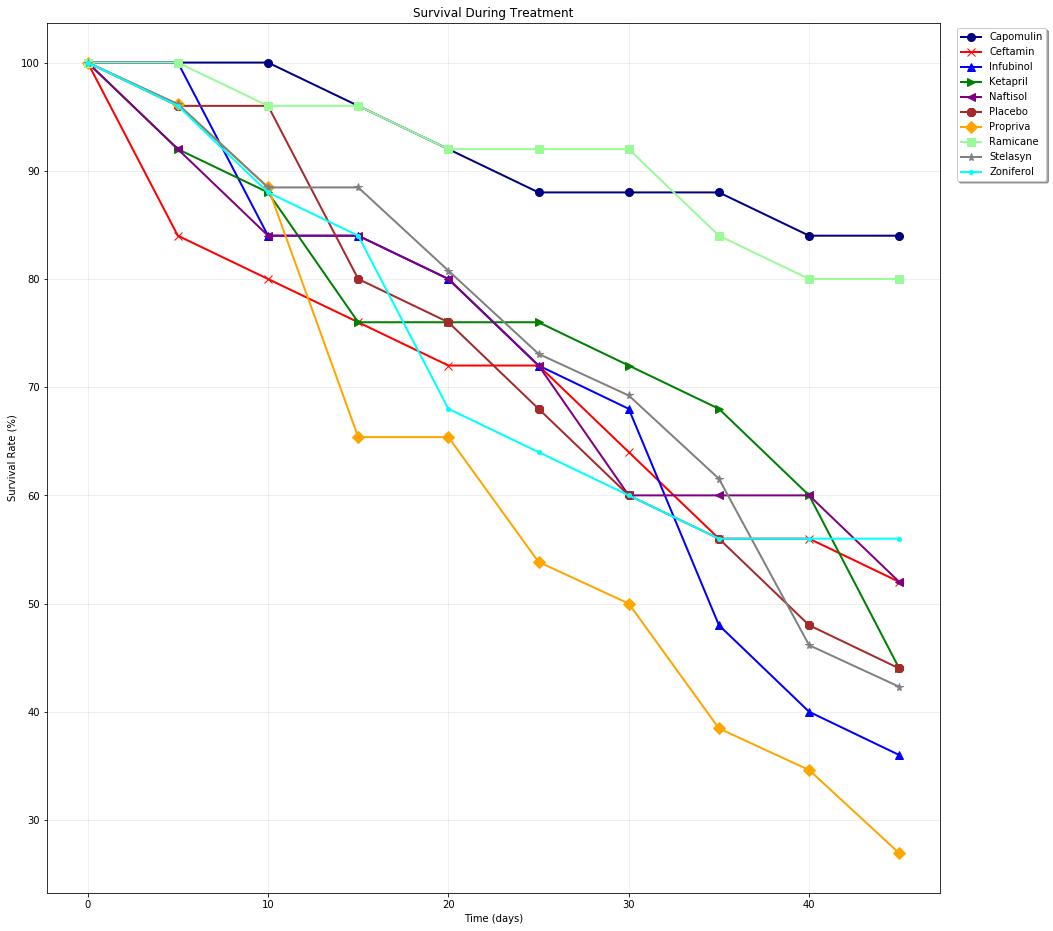

In [527]:
# Generate the Plot (with Error Bars)
drugs = pvt_mou_cnt.columns.values 
x_axis = df['Timepoint'].unique()
markers = ['o','x','^','>','<','8','D','s','*','.']
colors = ['navy','red','blue','green','purple','brown','orange','palegreen','grey','cyan']
plt.figure(figsize=(16,16))

i=0
for drug in drugs:
    plt.plot(
        x_axis, 
        (pvt_mou_cnt[drug]/pvt_mou_cnt[drug][0])*100,
        lw=2,
        markersize=8,
        marker=markers[i],
        color=colors[i]
    )
    plt.legend(drugs, bbox_to_anchor=(1.125,1), fancybox=True, shadow=True)
    i+=1

plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (days)')
plt.grid(alpha=.25)

# Save the Figure
plt.savefig("Images/SurvivalDuringTreatment.png",bbox_inches="tight")
plt.show()

## Summary Bar Graph

In [532]:
# Calculate the percent changes for each drug
change = []
for drug in drugs:
    pct_change = ((pvt_vol_mean.loc[45,drug]-pvt_vol_mean.loc[0,drug])/pvt_vol_mean.loc[0,drug])*100
    change.append(pct_change)

# Display the data to confirm
change = np.asarray(change)
change

array([-19.47530267,  42.51649186,  46.12347173,  57.02879469,
        53.92334713,  51.29796048,  47.24117486, -22.32090046,
        52.08513429,  46.57975087])

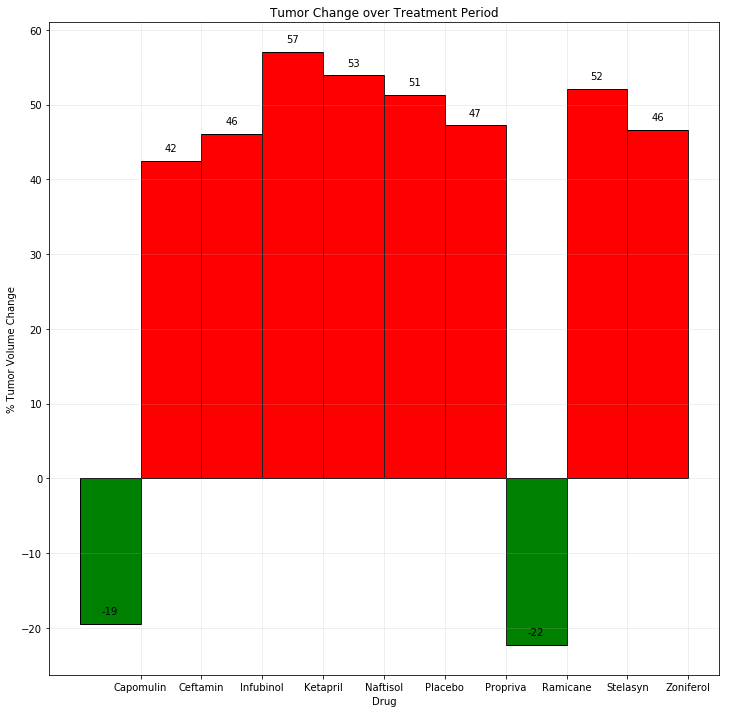

In [533]:
x_axis = np.arange(len(drugs))
tick_loc = [value for value in x_axis]
plt.figure(figsize=(12,12))

pos = change > 0
neg = change < 0

rects_pos = plt.bar(np.arange(len(change))[pos], change[pos], color='r', width=-1, align='edge', edgecolor='black')
rects_neg = plt.bar(np.arange(len(change))[neg], change[neg], color='g', width=-1, align='edge', edgecolor='black')
plt.xticks(tick_loc, drugs)
plt.title('Tumor Change over Treatment Period')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drug')
plt.grid(alpha=.25)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height+1,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects_pos)
autolabel(rects_neg)

# Save the Figure
plt.savefig("Images/TumorChangeSummary.png",bbox_inches="tight")
plt.show()